# DECISSION TREE IN PYTHON

## Tahap 1: Membaca Data

In [2]:
#import library
import pandas as pd

In [18]:
#import data
datapilot = pd.read_csv('D:\german_credit.csv',delimiter=',') 

#rename kolom Creditability jadi status
datapilot=datapilot.rename(columns=({"Creditability":"Status"}))

#menampilkan beberapa baris pertama datapilot
datapilot.head()

,Status,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Property,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,account < 0,18,critical account,funiture,1049,100 <= savings < 500,employed < 1 year,4,female-divorced/married,...,4,building society,21,none,rent,1,skilled employee,1,none,yes
1,1,account < 0,9,critical account,car-new,2799,500 <= savings < 1000,1 <= employed < 4 years,2,male-single,...,2,real estate,36,none,rent,2,skilled employee,2,none,yes
2,1,0 <= account < 200,12,existing credits,business,841,savings >= 1000,4 <= employed < 7 years,2,female-divorced/married,...,4,real estate,23,none,rent,1,unskilled-resident,1,none,yes
3,1,account < 0,12,critical account,car-new,2122,500 <= savings < 1000,1 <= employed < 4 years,3,male-single,...,2,real estate,39,none,rent,2,unskilled-resident,2,none,no
4,1,account < 0,12,critical account,car-new,2171,500 <= savings < 1000,1 <= employed < 4 years,4,male-single,...,4,building society,38,bank,own,2,unskilled-resident,1,none,no


## Tahap 2: Melihat hubungan antara prediktor dengan variabel target

In [4]:
#crosstab antara Jenis Kelamin dengan variabel Status
pd.crosstab(datapilot['Status'],datapilot['Foreign Worker'])

Foreign Worker,no,yes
Status,,
0,4,296
1,33,667


In [16]:
#crosstab antara Jenis Kelamin dengan variabel Tertarik  (persen baris)
pd.crosstab(datapilot['Status'],datapilot['Foreign Worker'],normalize='index')

Foreign Worker,1,2
Status,,
0,0.986667,0.013333
1,0.952857,0.047143


In [5]:
datapilot.dtypes

Status                                int64
Account Balance                      object
Duration of Credit (month)            int64
Payment Status of Previous Credit    object
Purpose                              object
Credit Amount                         int64
Value Savings/Stocks                 object
Length of current employment         object
Instalment per cent                   int64
Sex & Marital Status                 object
Guarantors                           object
Duration in Current address           int64
Property                             object
Age (years)                           int64
Concurrent Credits                   object
Type of apartment                    object
No of Credits at this Bank            int64
Occupation                           object
No of dependents                      int64
Telephone                            object
Foreign Worker                       object
dtype: object

In [20]:
#membuat variabel dummy dari variabel yang memiliki type string
datapilot = pd.get_dummies(datapilot, columns=['Payment Status of Previous Credit',"Purpose","Value Savings/Stocks",
                                               "Length of current employment","Sex & Marital Status","Guarantors",
                                              "Property","Concurrent Credits","Type of apartment","Occupation","Telephone","Foreign Worker"])

#datapilot['dtempat']=datapilot['tempat tinggal'].astype('category').cat.codes
datapilot.dtypes

Status                                                     int64
Duration of Credit (month)                                 int64
Credit Amount                                              int64
Instalment per cent                                        int64
Duration in Current address                                int64
Age (years)                                                int64
No of Credits at this Bank                                 int64
No of dependents                                           int64
Account Balance_0 <= account < 200                         uint8
Account Balance_account < 0                                uint8
Account Balance_account >= 200                             uint8
Account Balance_no cheking account                         uint8
Payment Status of Previous Credit_all credits paid back    uint8
Payment Status of Previous Credit_critical account         uint8
Payment Status of Previous Credit_delay paying in past     uint8
Payment Status of Previou

## Tahap 3: Membuat data training dan data testing

In [21]:

#memisahkan data variabel X dan variabel Y
x=datapilot.drop("Status",axis=1)
y=datapilot['Status']
x.head()

,Duration of Credit (month),Credit Amount,Instalment per cent,Duration in Current address,Age (years),No of Credits at this Bank,No of dependents,Account Balance_0 <= account < 200,Account Balance_account < 0,Account Balance_account >= 200,...,Type of apartment_own,Type of apartment_rent,Occupation_high qualified employee,Occupation_skilled employee,Occupation_unemployed,Occupation_unskilled-resident,Telephone_none,Telephone_yes,Foreign Worker_no,Foreign Worker_yes
0,18,1049,4,4,21,1,1,0,1,0,...,0,1,0,1,0,0,1,0,0,1
1,9,2799,2,2,36,2,2,0,1,0,...,0,1,0,1,0,0,1,0,0,1
2,12,841,2,4,23,1,1,1,0,0,...,0,1,0,0,0,1,1,0,0,1
3,12,2122,3,2,39,2,2,0,1,0,...,0,1,0,0,0,1,1,0,1,0
4,12,2171,4,4,38,2,1,0,1,0,...,1,0,0,0,0,1,1,0,1,0


In [22]:
#membagi data menjadi gugus data training (70%) dan testing (30%) secara random
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=101)

## Tahap 4: Membuat pohon klasifikasi berdasarkan data training

In [64]:
#pembuatan model berdasarkan data training
from sklearn.tree import DecisionTreeClassifier
pohon = DecisionTreeClassifier(min_samples_split=200, max_depth=5) #min split dan max depthnya tidak default

In [65]:
#model data training
pohon.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=200,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
#import library untuk menggambar/visualisasi pohon klasifikasi
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz


In [40]:
#melihat type data dari masing-masing variabel
datapilot.dtypes,x_train.shape

(Status                                                     int64
 Duration of Credit (month)                                 int64
 Credit Amount                                              int64
 Instalment per cent                                        int64
 Duration in Current address                                int64
 Age (years)                                                int64
 No of Credits at this Bank                                 int64
 No of dependents                                           int64
 Account Balance_0 <= account < 200                         uint8
 Account Balance_account < 0                                uint8
 Account Balance_account >= 200                             uint8
 Account Balance_no cheking account                         uint8
 Payment Status of Previous Credit_all credits paid back    uint8
 Payment Status of Previous Credit_critical account         uint8
 Payment Status of Previous Credit_delay paying in past     uint8
 Payment S

In [66]:
#mengubah type data Int menjadi string
y_baru=datapilot['Status'].apply(str)
y_baru.head()

0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: object

In [67]:
#melihat type data dari sebuah variabel
y_baru.dtypes


dtype('O')

In [68]:
#setting features name yang akan digunakan pada pembuatan pohon klasifikasi
fitur = list(datapilot.columns[1:62])
#fitur = datapilot.drop("Status",axis=1)
fitur

['Duration of Credit (month)',
 'Credit Amount',
 'Instalment per cent',
 'Duration in Current address',
 'Age (years)',
 'No of Credits at this Bank',
 'No of dependents',
 'Account Balance_0 <= account < 200',
 'Account Balance_account < 0 ',
 'Account Balance_account >= 200',
 'Account Balance_no cheking account',
 'Payment Status of Previous Credit_all credits paid back',
 'Payment Status of Previous Credit_critical account',
 'Payment Status of Previous Credit_delay paying in past',
 'Payment Status of Previous Credit_existing credits',
 'Payment Status of Previous Credit_no credits taken',
 'Purpose_business',
 'Purpose_car-new',
 'Purpose_car-used',
 'Purpose_domestic appliances',
 'Purpose_education',
 'Purpose_funiture',
 'Purpose_others',
 'Purpose_radio/TV',
 'Purpose_repairs',
 'Purpose_retraining',
 'Value Savings/Stocks_100 <= savings < 500',
 'Value Savings/Stocks_500 <= savings < 1000',
 'Value Savings/Stocks_no savings',
 'Value Savings/Stocks_savings < 100',
 'Value S

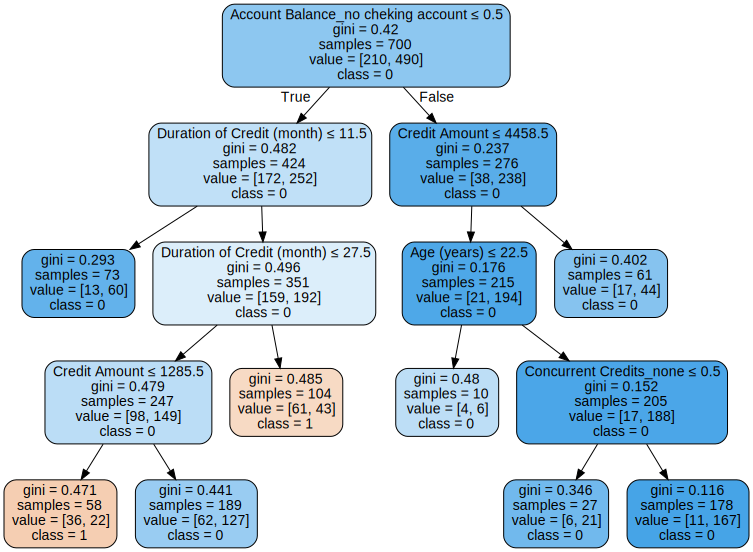

In [124]:
#membuat tampilan pohon klasifikasi
dot_data = tree.export_graphviz(pohon.fit(x_train,y_train),
                               feature_names=fitur,
                               class_names=y_baru.unique(),
                               filled=True, rounded=True,
                               special_characters=True,
                               out_file=None)
grafik=graphviz.Source(dot_data)
grafik


## Tahap 5: Evaluasi model

In [79]:
x_train.head()

,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
290,4,12,4,6,3565,5,2,2,3,1,1,2,37,3,2,2,2,2,1,1
167,4,24,4,9,4526,1,3,3,3,1,2,1,74,3,2,1,4,1,2,1
486,4,18,4,2,3780,1,2,3,1,1,2,3,35,3,2,2,4,1,2,1
683,2,15,4,3,1537,5,5,4,3,3,4,1,50,3,2,2,3,1,2,1
876,2,30,4,0,5234,1,1,4,4,1,2,3,28,3,2,2,4,1,1,1


In [69]:
prediksi=pohon.predict(x_train)

In [70]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, prediksi))
print("Precision:",metrics.precision_score(y_train, prediksi))
print("Recall:",metrics.recall_score(y_train, prediksi))
print("Specificity:",metrics.recall_score(y_train, prediksi))

Accuracy: 0.7457142857142857
Precision: 0.7899628252788105
Recall: 0.8673469387755102
Specificity: 0.8673469387755102


### Tugas 1: 

1. Hitunglah akurasi, presisi, dan recall dari forest yang sudah diperoleh, menggunakan data testing.

In [71]:
## Tugas
#prediksi data testing
prediksi=pohon.predict(x_test)

In [72]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, prediksi))
print("Precision:",metrics.precision_score(y_test, prediksi))
print("Recall:",metrics.recall_score(y_test, prediksi))
print("Specificity:",metrics.recall_score(y_test, prediksi))

Accuracy: 0.7233333333333334
Precision: 0.777292576419214
Recall: 0.8476190476190476
Specificity: 0.8476190476190476


# Random Forests

Mari kita bandingkan antara decission tree dengan random forest.

## Tahap 1: Membuat model random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\bagusco\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [73]:
rft = RandomForestClassifier(n_estimators=100)
rft.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Tahap 2: Prediksi dan Evaluasi

In [74]:
#prediksi
rft_pred = rft.predict(x_train)
rft_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [75]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data training

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_train, rft_pred))
print("Precision:",metrics.precision_score(y_train, rft_pred))
print("Recall:",metrics.recall_score(y_train, rft_pred))
print("Specificity:",metrics.recall_score(y_train, rft_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Specificity: 1.0


In [76]:
tabTest=pd.crosstab(y_train,rft_pred)
tabTest['total']=tabTest.sum(axis=1)
tabTest

col_0,0,1,total
Status,,,
0,210,0,210
1,0,490,490


### Tugas

1. Hitunglah akurasi, presisi, dan recall dari forest yang sudah diperoleh, menggunakan data testing.

In [77]:
rft = RandomForestClassifier(n_estimators=100)
rft.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [78]:
#prediksi
rft_pred = rft.predict(x_test)
rft_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], d

In [79]:
#melihat nilai akurasi, presisi, sensitifiti dan Specificity data testing

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rft_pred))
print("Precision:",metrics.precision_score(y_test, rft_pred))
print("Recall:",metrics.recall_score(y_test, rft_pred))
print("Specificity:",metrics.recall_score(1-y_test, 1-rft_pred))

Accuracy: 0.7666666666666667
Precision: 0.7868852459016393
Recall: 0.9142857142857143
Specificity: 0.4222222222222222


In [80]:
importances = rft.feature_importances_
importances

array([0.08167133, 0.10981309, 0.03277669, 0.03579906, 0.08673185,
       0.02172063, 0.01279011, 0.01645181, 0.03519675, 0.00847017,
       0.04197628, 0.00745355, 0.01885816, 0.01037302, 0.01421049,
       0.01195474, 0.0111436 , 0.01835224, 0.01049661, 0.0013933 ,
       0.00861233, 0.01491234, 0.00169015, 0.01566843, 0.00412292,
       0.00123814, 0.01141035, 0.01214681, 0.00903129, 0.00734809,
       0.00844584, 0.01027992, 0.00838336, 0.01159835, 0.0107846 ,
       0.00740412, 0.01429717, 0.00731312, 0.00749566, 0.01670221,
       0.00534086, 0.00603346, 0.00834045, 0.01445176, 0.0151442 ,
       0.01056227, 0.01546264, 0.01379529, 0.01366194, 0.00578891,
       0.00540028, 0.01542499, 0.01273237, 0.01199252, 0.01507688,
       0.00186635, 0.01272669, 0.01641521, 0.01599352, 0.00413675,
       0.00313398])

In [111]:
#sorting
import numpy as np
indices = np.argsort(importances)
indices

array([25, 19, 22, 55, 60, 24, 59, 40, 50, 49, 41, 37, 29, 35, 11, 38, 42,
       32, 30,  9, 20, 28, 31, 13, 18, 45, 34, 16, 26, 33, 15, 53, 27, 56,
       52,  6, 48, 47, 14, 36, 43, 21, 54, 44, 51, 46, 23, 58, 57,  7, 39,
       17, 12,  5,  2,  8,  3, 10,  0,  4,  1], dtype=int64)

In [114]:
indices[50:61,]

array([39, 17, 12,  5,  2,  8,  3, 10,  0,  4,  1], dtype=int64)

In [115]:
indices=indices[50:61,]

In [118]:
features = datapilot.columns[1:62][indices]
print(features)

Index(['Sex & Marital Status_male-single', 'Purpose_car-new',
       'Payment Status of Previous Credit_critical account',
       'No of Credits at this Bank', 'Instalment per cent',
       'Account Balance_account < 0 ', 'Duration in Current address',
       'Account Balance_no cheking account', 'Duration of Credit (month)',
       'Age (years)', 'Credit Amount'],
      dtype='object')


Text(0.5,0,'Relative Importance')

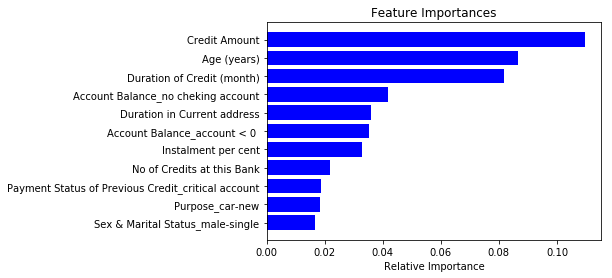

In [119]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features)
plt.xlabel('Relative Importance')